# 1) Testing EoS 

In [ ]:
import numpy as np
from EOS import NeutronStarEOS

In [ ]:
apr = NeutronStarEOS('apr')
pres = apr.get_pressure()
dZeta = apr.dZeta_dXi()

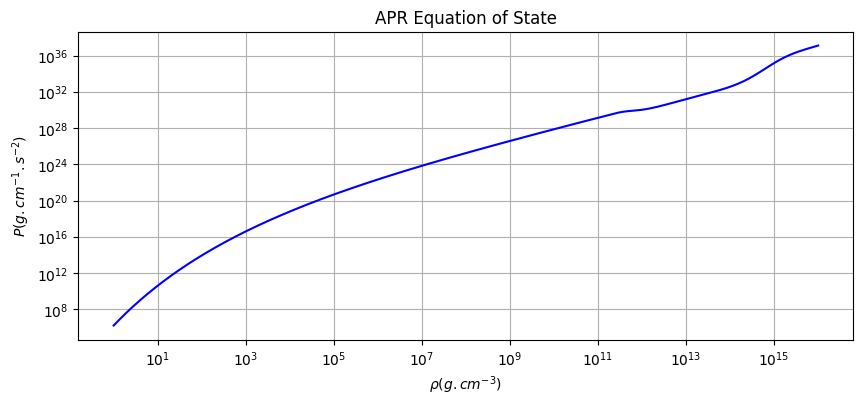

In [ ]:
apr.plot_EoS()

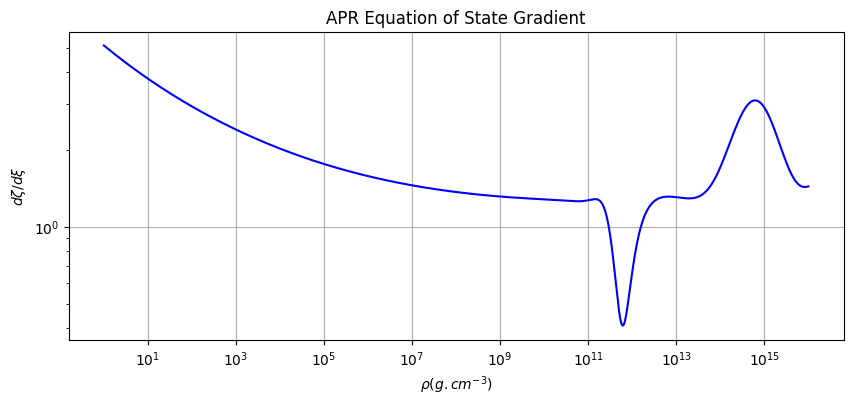

In [ ]:
apr.plot_dZeta_dXi()

# 2) Do I have the right equations?

In [ ]:
from IPython.display import display, Math
import sympy as sp

In [ ]:
import numpy as np

## 2.1) KG with IC

In [ ]:
# KG equation

#Define the symbols and functions
r = sp.symbols('r')
fa, ma, c, mu, G = sp.symbols('f_a m_a c mu G')
a = sp.Function('a')(r)
rho = sp.Function('rho')(r)
llambda = sp.Function('lambda')(r)
nu = sp.Function('nu')(r)

# Define the equation
KG = ma**2 * sp.exp(llambda) * sp.sin(a) + (c**2 * rho)/(mu*fa) * sp.exp(llambda) + \
           sp.diff(a, r) * (-2/r + 
           1/2  * sp.diff(llambda, r) - 
           1/2  * sp.diff(nu, r))
           

# Display the equation in LaTeX form
display_KG = sp.Eq(sp.diff(a, r, r), KG)
display_KG

Eq(Derivative(a(r), (r, 2)), c**2*rho(r)*exp(lambda(r))/(f_a*mu) + m_a**2*exp(lambda(r))*sin(a(r)) + (0.5*Derivative(lambda(r), r) - 0.5*Derivative(nu(r), r) - 2/r)*Derivative(a(r), r))

In [ ]:
# initial condition
ri, a_c, rho_c, a_i= sp.symbols('r_i a_c rho_c a_i')

# Define the expression for a_ri
a_ri = a_c + (ri**2 * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / (6 * fa * mu)

# Display the expression
display_a_ri = sp.Eq(a_i,a_ri)
display_a_ri


Eq(a_i, a_c + r_i**2*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))/(6*f_a*mu))

## 2.2) TOV

In [ ]:
# TOV
# Define additional symbols and functions needed for the new equation
P = sp.Function('P')(rho)  # Pressure as a function of r
dZetadXi = sp.Function('dZetadXi')(rho)  # Derivative of Zeta with respect to Xi

# Correcting the usage of rho and other functions
TOV = -((fa * rho * ((3 * P) / mu - (c**2 * rho) / mu) * sp.diff(a, r)) /
                 (dZetadXi * P)) - (rho * (P + c**2 * rho) * sp.diff(nu, r)) / \
                 (2 * dZetadXi * P) 

# Display the new equation
display_TOV = sp.Eq(sp.diff(rho, r), TOV)
display_TOV

Eq(Derivative(rho(r), r), -f_a*(-c**2*rho(r)/mu + 3*P(rho(r))/mu)*rho(r)*Derivative(a(r), r)/(P(rho(r))*dZetadXi(rho(r))) - (c**2*rho(r) + P(rho(r)))*rho(r)*Derivative(nu(r), r)/(2*P(rho(r))*dZetadXi(rho(r))))

In [ ]:
# Define the symbols
rho_ri = sp.symbols('rho_ri')

# Define P as a function of rho_c
P = sp.Function('P')(rho_c)

# Define the derivative of P with respect to rho at rho = rho_c
dP_drho_c = sp.diff(P, rho_c) 

# Define the complex expression for Rho[ri]
Rho_ri = rho_c - 1/(6 * mu * dP_drho_c) * ri**2 * (
    (4 * G * sp.pi * rho_c * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * P)) / c**2 +
    (4 * G * sp.pi * P * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * P)) / c**4 +
    (c**2 * rho_c * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / mu -
    (3 * P * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / mu
)

# Display the expression
display_Rho_ri = sp.Eq(rho_ri, Rho_ri)
display_Rho_ri


Eq(rho_ri, rho_c - r_i**2*(4*pi*G*rho_c*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))/c**2 + 4*pi*G*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))*P(rho_c)/c**4 + c**2*rho_c*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))/mu - 3*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))*P(rho_c)/mu)/(6*mu*Derivative(P(rho_c), rho_c)))

## 2.3) Metric Potential

In [ ]:
# metric potential
G = sp.symbols('G')  # Gravitational constant

# Define the new equation
metric_pot = -1/r + sp.exp(llambda)/r + (8 * sp.exp(llambda) * G * sp.pi * r * P)/c**4 - \
                 (8 * sp.exp(llambda) * fa * G * sp.pi * r * (-fa * ma**2 * mu * (-1 + sp.cos(a)) + \
                 c**2 * a * rho))/(c**4 * mu) + \
                 (4 * fa**2 * G * sp.pi * r * sp.diff(a, r)**2)/c**4

# Display the new equation
display_metric_pot = sp.Eq(sp.diff(nu, r),metric_pot)
display_metric_pot



Eq(Derivative(nu(r), r), 4*pi*G*f_a**2*r*Derivative(a(r), r)**2/c**4 - 8*pi*G*f_a*r*(c**2*a(r)*rho(r) - f_a*m_a**2*mu*(cos(a(r)) - 1))*exp(lambda(r))/(c**4*mu) + 8*pi*G*r*P(rho_c)*exp(lambda(r))/c**4 + exp(lambda(r))/r - 1/r)

In [ ]:

# Define PP as a function of rho_c if it's not already defined
P = sp.Function('P')(rho_c)
nu_c = sp.symbols('nu_c')  # Gravitational constant
nu_i = sp.symbols('nu_i')

# Define the expression for Nu[ri]
Nu_ri = nu_c + (4 * G * sp.pi * ri**2 * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * P)) / (3 * c**4 * mu)

# Display the expression
display_Nu_ri = sp.Eq(nu_i,Nu_ri)
display_Nu_ri


Eq(nu_i, 4*pi*G*r_i**2*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))/(3*c**4*mu) + nu_c)

## 2.4) Mass Equation

In [ ]:
# mass equation
mass_eq = 1/r - sp.exp(llambda)/r + (8 * sp.exp(llambda) * G * sp.pi * r * P)/c**4 + \
                 (8 * sp.exp(llambda) * fa * G * sp.pi * r * (-fa * ma**2 * mu * (-1 + sp.cos(a)) + \
                 c**2 * a * rho))/(c**4 * mu) + \
                 (4 * fa**2 * G * sp.pi * r * sp.diff(a, r)**2)/c**4

# Display the new equation
display_mass_eq = sp.Eq(sp.diff(llambda, r), mass_eq)
display_mass_eq



Eq(Derivative(lambda(r), r), 4*pi*G*f_a**2*r*Derivative(a(r), r)**2/c**4 + 8*pi*G*f_a*r*(c**2*a(r)*rho(r) - f_a*m_a**2*mu*(cos(a(r)) - 1))*exp(lambda(r))/(c**4*mu) + 8*pi*G*r*P(rho_c)*exp(lambda(r))/c**4 - exp(lambda(r))/r + 1/r)

In [1]:
# Define the symbols
llambda_i = sp.symbols('lambda_i')

# Define the expression for Lambda[ri]
Lambda_ri = (8 * G * sp.pi * ri**2 * (fa**2 * ma**2 * mu + a_c * c**2 * fa * rho_c + c**2 * mu * rho_c - fa**2 * ma**2 * mu * sp.cos(a_c))) / (3 * c**4 * mu)

# Display the expression
display_Lambda_ri = sp.Eq(llambda_i, Lambda_ri)
display_Lambda_ri

NameError: name 'sp' is not defined

# 3) Formulate the Solver and test it

In [1]:
%matplotlib widget
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_bvp
from EOS import NeutronStarEOS
from ode_system import central_densities, ode_system, create_boundary_conditions

In [2]:
apr_eos = NeutronStarEOS('APR')
interp_pressure = apr_eos.get_pressure()


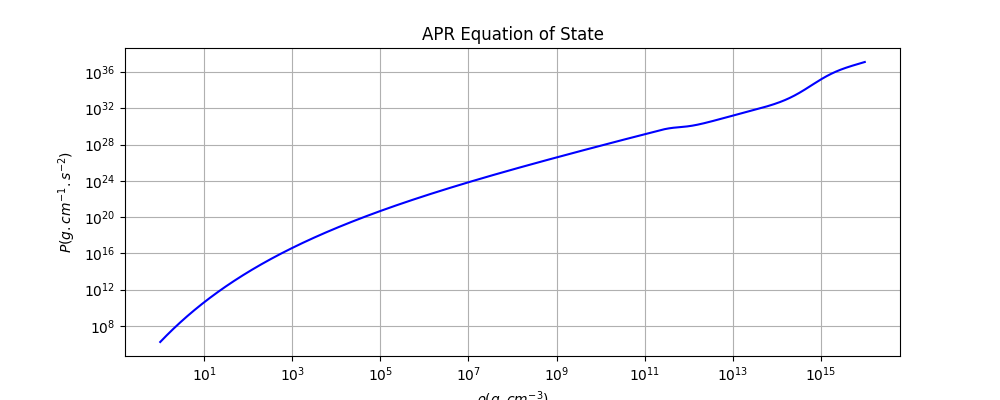

In [6]:
apr_eos.plot_EoS()

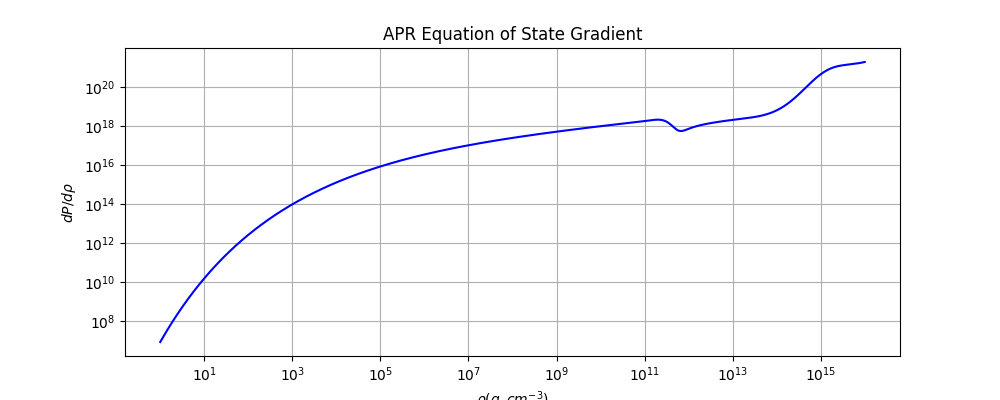

In [5]:
apr_eos.plot_dP_drho()

In [31]:
smoothed_interp_dP_drho(0.119)

array(-1013.87335463)

0.0
1.270226529060697e-08


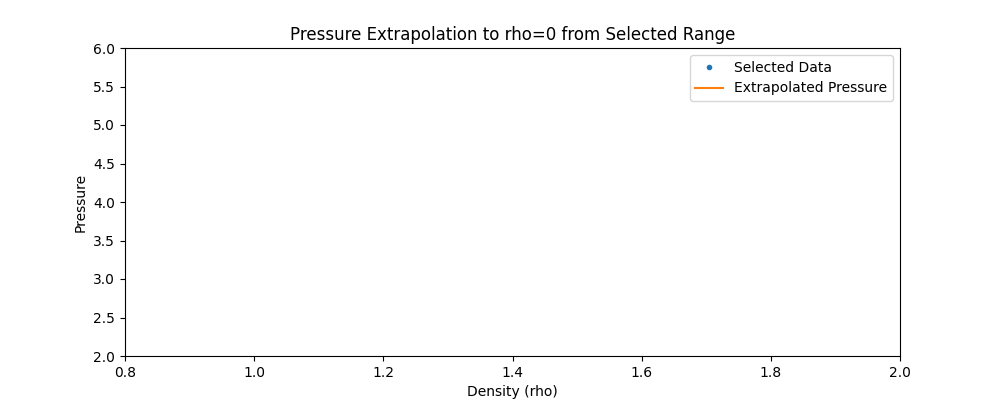

In [4]:
plt.cla()
plt.figure(figsize=(10, 4))
# Selecting the specific range of rho values (1 to 1e3)
mask = (apr_eos.rhos >= 1) & (apr_eos.rhos <= 2)
selected_rhos = apr_eos.rhos[mask]
selected_rhos = np.insert(selected_rhos, 0, 0.0)
selected_pressures = apr_eos.pressures[mask]
selected_pressures = np.insert(selected_pressures, 0, 0.0)
print(min(selected_pressures))

# Fit a polynomial (adjust the degree as necessary)
degree = 12 # Example degree, you can modify this based on your observations
coeffs = np.polyfit(selected_rhos, selected_pressures, degree)
polynomial = np.poly1d(coeffs)

# Define a range of rho values for extrapolation (down to rho=0)
rho_extrapolate = np.linspace(0, max(selected_rhos), 10)

# Extrapolate pressure using the polynomial
extrapolated_pressure = polynomial(rho_extrapolate)

print(min(extrapolated_pressure))
# Plotting
plt.plot(selected_rhos, selected_pressures, 'o', label='Selected Data', zorder=-1, markersize=3)
plt.plot(rho_extrapolate, extrapolated_pressure, '-', label='Extrapolated Pressure')
plt.xlabel('Density (rho)')
plt.ylabel('Pressure')
plt.title('Pressure Extrapolation to rho=0 from Selected Range')
plt.xlim(0.8,2)
plt.ylim(2, 6)
plt.axhline(y=0, linestyle='-', color='grey', linewidth='0.6', zorder=-2)
plt.legend()

In [24]:
new_press = np.concatenate([selected_pressures[1:], extrapolated_pressure])
new_rhos = np.concatenate([selected_rhos[1:], rho_extrapolate])


In [25]:
selected_pressures[:5]

array([      0.        , 1659586.90745153, 1691082.24571479,
       1723158.35105901, 1755825.61664459])

In [26]:
selected_rhos[:5]

array([0.        , 1.        , 1.0036913 , 1.00739623, 1.01111483])

In [19]:
extrapolated_pressure

array([1.27022653e-08, 4.93154418e+02, 2.04947956e+04, 1.96564590e+05,
       9.03000210e+05, 2.82355942e+06, 6.98109378e+06, 1.47443677e+07,
       2.78226569e+07, 4.82539316e+07])

In [20]:
rho_extrapolate

array([0.        , 0.22211995, 0.44423991, 0.66635986, 0.88847981,
       1.11059977, 1.33271972, 1.55483967, 1.77695963, 1.99907958])

In [7]:
print(len(new_rhos))
print(len(new_press))

199
199


In [8]:
new_press = np.unique(new_press)
new_rhos = np.unique(new_rhos)
new_press = np.sort(new_press)
new_rhos = np.sort(new_rhos)

In [9]:
len(new_rhos)

198

In [10]:
len(new_press)

199

In [10]:
interp_new_press = interp1d(new_rhos, new_press, kind='cubic')

ValueError: x and y arrays must be equal in length along interpolation axis.

In [17]:
gToGeV = 5.62e23 # (g/GeV)*)
cmInvToGeV = 1.98e-14 # (*cm^-1/GeV*) 
cmToGeVInv = 1/cmInvToGeV # (*GeV^-1/cm*)
gCm3ToGeV4 = (cmInvToGeV)**3 * gToGeV # (*g/cm^3 -> GeV^4*)
GeV4TogCm3 = 1/gCm3ToGeV4 # (*GeV^4 -> g/cm^3*)
sInvtoGeV = 6.58e-25 # (*GeV.s*)
GeVToErg = 1/(6.24e2) # (*Erg/GeV*)
PressueToGeV4 = gToGeV * cmInvToGeV * sInvtoGeV**2 # lol 
PhiFaGeVToCGs =( 1/gToGeV * 1/cmToGeVInv * (1/sInvtoGeV)**2)**(1/2) # (*(GeV . GeV^-1 . GeV^2)^(1/2) -> (g . cm . s^-2)*)
Msun = 1.988e33 # grams
G =6.6743e-8 # (*dyne cm^2/g^2*)
c = 3e10 # (*cm/s*) 
fa = 1e15*PhiFaGeVToCGs # (*g^1/2 cm^1/2 s^-2*)
ma = 1e-11*1e-9 * cmToGeVInv; # (*1/L*)
NeutronMass = 0.939565 # (*GeV*) 
mu =(NeutronMass)/(1e-25) * PhiFaGeVToCGs # (*GeV*)

def create_boundary_conditions(eos_class, rho_c, nu_c, lambda_c, a_c, ri):
    """Create a boundary conditions function with specific initial conditions."""
    
    P = eos_class.get_pressure()
    dPdrho = eos_class.dP_drho(rho_c) # need to make this method
    nu_initial = nu_c + (4 * G * np.pi * ri**2 * \
                            (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + \
                            c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + \
                                3 * mu * P(rho_c))) / (3 * c**4 * mu)
    
    llambda_initial = lambda_c + (8 * G * np.pi * ri**2 * \
                 (fa**2 * ma**2 * mu + a_c * c**2 * fa * rho_c + c**2 * mu * rho_c -  \
                  fa**2 * ma**2 * mu * np.cos(a_c))) / (3 * c**4 * mu)
    
    rho_initial = rho_c - 1/(6 * mu * dPdrho) * ri**2 * (
        (4 * G * np.pi * rho_c * \
         (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + 3 * mu * P(rho_c))) \
            / c**2 + (4 * G * np.pi * P(rho_c) * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + \
                                           c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + 3 * mu * P(rho_c))) / c**4 \
                                            + (c**2 * rho_c * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / mu - \
                                                  (3 * P(rho_c) * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / mu )
    a_initial_guess = a_c + (ri**2 * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / (6 * fa * mu)

    def boundary_conditions(ya, yb):
        return np.array([
            ya[1],                 # ya[1] a_prime(ri) = 0
            yb[1] ,                 # a_prime(rf) = 0
            ya[2] - nu_initial,    # nu(ri) = nu_initial
            ya[3] - llambda_initial, # lambda(ri) = lambda_initial
            ya[4] - rho_initial    # rho(ri) = rho_initial
        ])
    return boundary_conditions, a_initial_guess, nu_initial, llambda_initial, rho_initial
#
#
#
debug_info = []
#
#
# ode wrapper
def ode_system_wrapper(r, y):
    P = apr_eos.get_pressure()
    dZetadXi = apr_eos.dZeta_dXi()
    return ode_system(r, y, P, dZetadXi)

In [18]:
# Define the domain for r
ri = 1e-10
rf = 2e8
start_order = int(np.log10(ri))
end_order = int(np.log10(rf))
points_per_order = 300  # Adjust the number of points per order of magnitude

# Create a single array with the desired number of points per order of magnitude
#r = np.logspace(start_order, end_order, (end_order - start_order) * points_per_order, endpoint=True)
r_original = np.logspace(start_order, end_order, (end_order - start_order) * points_per_order, endpoint=True)
r_dense = np.logspace(0, 1, 450)

# Combine the meshes
r = r_original#np.unique(np.concatenate((r_original, r_dense)))

print(len(r))

5400


In [19]:
boundary_conditions_func, a_initial, nu_initial, llambda_initial, rho_initial = create_boundary_conditions(eos_class=apr_eos,
    rho_c=1e15,
    nu_c=1,
    lambda_c=0,
    a_c=-2.3807e-04,
    ri=ri
)
print(boundary_conditions_func)
print(f"a_initial= {a_initial:0.2e}" )
print(f"nu_initial = {nu_initial:0.2e}")
print(f"llambda_initial= {llambda_initial:0.2e}")
print(f"rho_initial:{rho_initial:0.2e}")

<function create_boundary_conditions.<locals>.boundary_conditions at 0x13045ab60>
a_initial= -2.38e-04
nu_initial = 1.00e+00
llambda_initial= 6.21e-33
rho_initial:1.00e+15


In [21]:
# Define the initial guess for the solution
ac = a_initial  # Initial guess for a(r)
final_value_a = 0
y_initial = np.zeros((5, r.size))  # Initialize the array with zeros

#idx_10_km =  np.argmax(r >= 7e6)
# set the first value of a(r) to ac
y_initial[0, 0] = ac #idx_10_km] = ac
# linearly interpolate the remaining values of a(r) from ac to final_value_a
#y_initial[0, idx_10_km:] = 0
# density
y_initial[1, :] = 0  # a_prime(r)
y_initial[2, :] = nu_initial  # nu(r)
y_initial[3, :] = llambda_initial  # llambda(r)
y_initial[4, :] = np.linspace(rho_initial, 1e3, r.size)  # rho(r)

In [22]:
y_initial[0,:]

array([-0.00023807,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [23]:
debug_info = []


# Solve the BVP
sol = solve_bvp(ode_system_wrapper, boundary_conditions_func, r, y_initial)

# Process the solution
a = sol.sol(r)[0]
a_prime = sol.sol(r)[1]
nu = sol.sol(r)[2]
llambda = sol.sol(r)[3]
rho = sol.sol(r)[4]

# Check if the solution is successful and process it
if sol.success:
    print('Solution found!')
else:
    print("Solution was not successful.")

Solution was not successful.


In [27]:
def plot_somethin(y, x, y_label, x_label=r'$r(km)$', debug=False):
    plt.figure(figsize=(8, 4))
    plt.plot(x/1e5, y, color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if debug:
       plt.xlim(x[-700]/1e5,x[-1]/1e5) 
    else:
        plt.xscale('log')
        plt.yscale('log')
    plt.axvline(x=1e6/1e5, linestyle='--', color='grey', linewidth=0.4,zorder=-1)

    #plt.yscale('log')
    return plt.show()

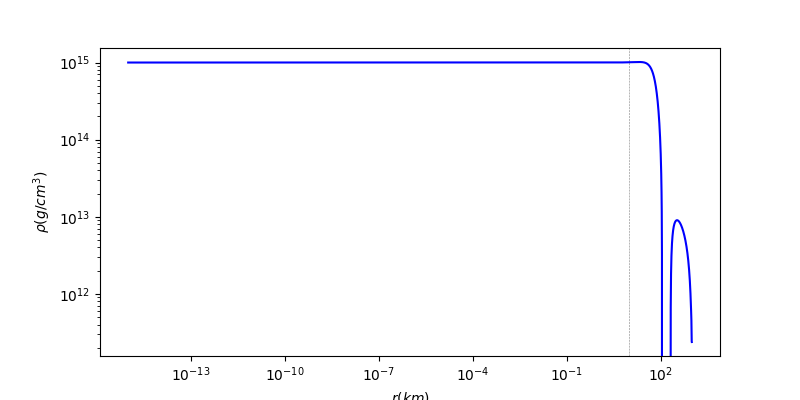

In [28]:
plot_somethin(rho, r, r"$\rho(g/cm^{3})$", x_label=r'$r(km)$', debug=False)

In [ ]:
# Assuming you have defined central_densities, P, dZetadXi, etc.
lower_limit = 1e14
upper_limit = 1e16
n_points = 30
densities = central_densities(lower_limit, upper_limit, n_points)

for rho_initial in densities:
    boundary_conditions_for_rho = create_boundary_conditions(rho_initial, nu_initial=1, lambda_initial=0)
    # Solve the BVP with this specific boundary conditions function
    sol = solve_bvp(ode_system, boundary_conditions_for_rho, r, y_initial, args=(P, dZetadXi))

    # Check the solution and process it
    if sol.success:
        # Process the solution for this rho_initial
        pass
    else:
        print(f"Solution was not successful for rho_initial = {rho_initial}")

TypeError: create_boundary_conditions() got an unexpected keyword argument 'nu_initial'